<a href="https://colab.research.google.com/github/AnishaShende/Python-projects/blob/main/analysis_of_technical_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt
import pandas as pd
import locale
import math

In [28]:
locale.setlocale(locale.LC_ALL, '')

df = pd.read_csv('technical_job_analysis_dataset.csv')
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')


In [29]:
df[:5]
print(df)
df = df[['job_title', 'salary_in_usd']]
df = df.rename(columns={'salary_in_usd': 'salary'})

       work_year experience_level employment_type                 job_title  \
0           2024      Entry-level       Freelance    Applied Data Scientist   
1           2024        Executive       Full-time     Business Intelligence   
2           2024        Executive       Full-time     Business Intelligence   
3           2024           Senior       Full-time            Data Architect   
4           2024           Senior       Full-time            Data Architect   
...          ...              ...             ...                       ...   
14194       2021           Senior       Full-time           Data Specialist   
14195       2020           Senior       Full-time            Data Scientist   
14196       2021        Mid-level       Full-time  Principal Data Scientist   
14197       2020      Entry-level       Full-time            Data Scientist   
14198       2020      Entry-level        Contract     Business Data Analyst   

       salary salary_currency  salary_in_usd employ

In [30]:
def top_popular_fields(num_fields):

  # Calculate the count of each job title
  job_title_counts = df['job_title'].value_counts()

  # Select only the top num_fields job titles
  top_job_titles = job_title_counts.head(num_fields)

  other_count = job_title_counts[num_fields:].sum()

  # Create a new DataFrame for top num_fields job titles and "other"
  top_vs_other = pd.concat([top_job_titles, pd.Series({'Other': other_count})])
  mycolors = ['#654321', '#f4a460', '#ffe9d2', '#a0522d', '#333333', '#8b4513', '#010101', '#ffe9d2','#e1c0b6', '#ffdf4f']

  # Plotting the pie chart
  plt.figure(figsize=(10, 6))
  plt.pie(top_vs_other, labels=top_vs_other.index, autopct='%1.1f%%', startangle=90, colors=mycolors)
  plt.title('Percentage of Employees by Job Title')
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  # Show plot
plt.show()

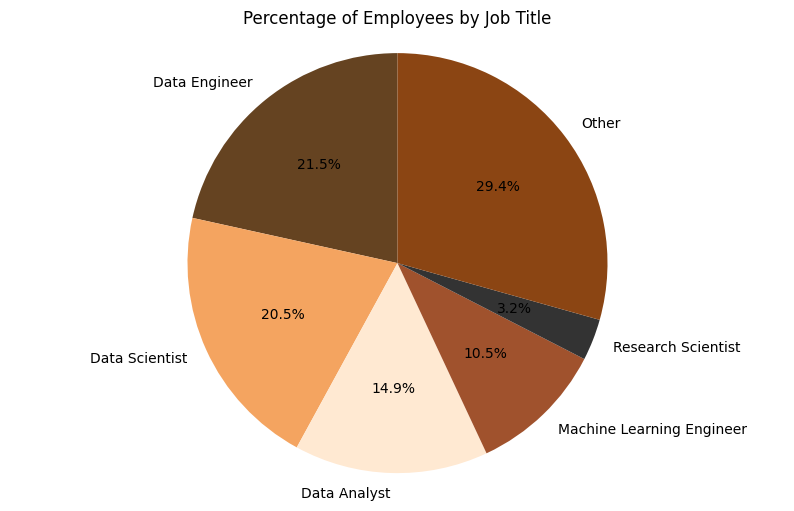

In [31]:
top_popular_fields(5)

# all unique job titles
# print(df['job_title'].unique())

In [32]:
'''
We will perform statistical inference for the following job titles:

Data Scientist
Data Analyst
Data Engineer
'''

'\nWe will perform statistical inference for the following job titles:\n\nData Scientist\nData Analyst\nData Engineer\n'

In [33]:
'''
We will calculate the following information:

Min
Max
Mean: The average of all the numbers in a data set, calculated by adding all the numbers and dividing by the number of values
Median: The middle value of a data set with an odd number of values, or the average of the two middle values of a data set with an even number of values
Mode: The value that occurs most frequently in a data set
Variance: The difference between individual data points and the mean
Standard deviation: The square root of variance, which measures how close the data set is to the mean
Range: The difference between a data set's maximum and minimum values
Sampling error: The absolute value of the difference between the population mean and sample mean

Estimation of population mean, variance, and standard deviation from sample parameters
'''

"\nWe will calculate the following information:\n\nMin\nMax\nMean: The average of all the numbers in a data set, calculated by adding all the numbers and dividing by the number of values\nMedian: The middle value of a data set with an odd number of values, or the average of the two middle values of a data set with an even number of values\nMode: The value that occurs most frequently in a data set\nVariance: The difference between individual data points and the mean\nStandard deviation: The square root of variance, which measures how close the data set is to the mean\nRange: The difference between a data set's maximum and minimum values\nSampling error: The absolute value of the difference between the population mean and sample mean\n\nEstimation of population mean, variance, and standard deviation from sample parameters\n"

In [34]:
mean_population = df.mean(numeric_only=True) #149472.0494
median_population = df.median(numeric_only=True)
mode_population = df.mode(numeric_only=True)
print(mean_population)
print(median_population)
print(mode_population)

salary    149472.04944
dtype: float64
salary    142000.0
dtype: float64
   salary
0  150000


In [35]:
def infer(data_frame, job_title = ''):

  # Filters the DataFrame data_frame based on the job_title
  df_sample = data_frame.query(f"job_title == '{job_title}'") if job_title != '' else data_frame

  # Reindexes the filtered DataFrame df_sample
  df_sample.index = range(1, len(df_sample) + 1)

  plot_data(df_sample, job_title)
  print_inferences(df_sample, job_title)

In [36]:
def plot_data(data_frame, job_title):

  # Calculate the minimum and maximum salaries
  min_salary = data_frame['salary'].min()
  max_salary = data_frame['salary'].max()

  # Define the number of bins (you can adjust this as needed)
  num_bins = 10

  # Generate salary bins dynamically
  salary_bins = pd.cut(data_frame['salary'], bins=num_bins, include_lowest=True)

  # Group by salary range and count number of employees
  salary_count = data_frame.groupby(salary_bins)['salary'].count()

  # Plot the bar chart
  salary_count.plot(kind='bar', color='#ff7300')
  plt.title(f'Distribution of {job_title if job_title != "" else "Employee"} Salaries')
  plt.xlabel('Salary Range (USD)')
  plt.ylabel('Number of Employees')

  # Convert x-axis labels to integers
  labels = [f'{int(label.left)}-{int(label.right)}' for label in salary_count.index]
  plt.xticks(range(len(labels)), labels, rotation=45)

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

In [37]:
# Calculating the confidence interval for the population mean

def estimate_population_mean(confidence_level_per, sample_length, sample_std, sample_mean):

  alpha = 1 - confidence_level_per / 100
  area_to_left = (1 - alpha) + (alpha / 2)
  z = norm.ppf(area_to_left)

  # Margin of error
  a = z * sample_std / math.sqrt(sample_length)

  # Calculating limits of the confidence interval for the population mean
  lower_mean_limit = sample_mean - a
  higher_mean_limit = sample_mean + a

  return (lower_mean_limit, higher_mean_limit)

In [38]:
# Estimate the range within which the population variance and standard deviation are likely to lie with a certain level of confidence

def estimate_population_variance_and_deviation(confidence_level_per, sample_length, sample_variance):

  # Using chi-square distribution
  degree_of_freedom = sample_length - 1
  alpha = 1 - confidence_level_per / 100

  chi_left_area_to_right = alpha / 2
  chi_right_area_to_right = (confidence_level_per / 100) + (alpha / 2)
  chi_left = chi2.ppf(chi_left_area_to_right, degree_of_freedom)
  chi_right = chi2.ppf(chi_right_area_to_right, degree_of_freedom)

  # Margin of error
  a = degree_of_freedom * sample_variance

  # Calculating Confidence Interval
  lower_variance_limit = a / chi_right
  higher_variance_limit = a / chi_left
  lower_deviation_limit = math.sqrt(lower_variance_limit)
  higher_deviation_limit = math.sqrt(higher_variance_limit)

  return [(lower_variance_limit, higher_variance_limit), (lower_deviation_limit, higher_deviation_limit)]

In [39]:
# Calculates descriptive statistics such as minimum, maximum, mean, median, mode, variance, standard deviation, and sampling error
# based on the salary data in the DataFrame data_frame

def print_inferences(data_frame, job_title):
  min_salary = data_frame['salary'].min()
  max_salary = data_frame['salary'].max()
  mean = data_frame['salary'].mean()
  median = data_frame['salary'].median()
  mode = data_frame['salary'].mode()[0]
  variance = data_frame['salary'].var()
  deviation = data_frame['salary'].std()
  sampling_error = abs(mean - mean_population).iloc[0]
  lower_mean_estimation_limit, higher_mean_estimation_limit = estimate_population_mean(95, len(data_frame), deviation, mean)
  variance_std_estimations = estimate_population_variance_and_deviation(95, len(data_frame), variance)
  lower_variance_estimation_limit, higher_variance_estimation_limit = variance_std_estimations[0]
  lower_deviation_estimation_limit, higher_deviation_estimation_limit = variance_std_estimations[1]

  print(f'''
    Min = {round(min_salary, 4)}
    Max = {round(max_salary, 4)}
    Mean = {round(mean, 4)}
    Median = {round(median)}
    Mode = {mode}
    Deviation = {round(deviation)}
    Variance = {round(variance)}
    Range = {round(max_salary - min_salary, 2)}
    Sampling Error = {round(sampling_error, 4)}

    Estimations:
      {round(lower_mean_estimation_limit, 4)} < population_mean < {round(higher_mean_estimation_limit, 4)}
      {round(lower_variance_estimation_limit, 4)} < population_variance < {round(higher_variance_estimation_limit, 4)}
      {round(lower_deviation_estimation_limit, 4)} < population_deviation < {round(higher_deviation_estimation_limit, 4)}

    Based on the above statistics, we can the following inferences for {job_title + " " if job_title != "" else ""}employees:
      1) The most common salary is {locale.currency(mode, grouping=True)}
      2) The minimum salary is {locale.currency(min_salary, grouping=True)}
      3) The maximum salary is {locale.currency(max_salary, grouping=True)}
      4) The average salary is {locale.currency(mean, grouping=True)}
    ''')

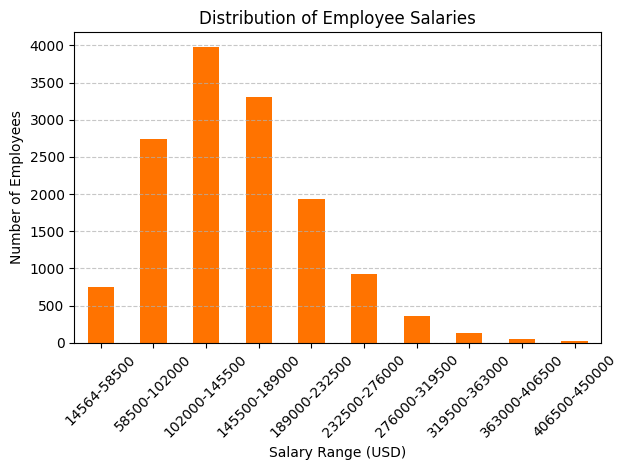


    Min = 15000
    Max = 450000
    Mean = 149472.0494
    Median = 142000
    Mode = 150000
    Deviation = 64379
    Variance = 4144689139
    Range = 435000
    Sampling Error = 0.0

    Estimations:
      148413.1245 < population_mean < 150530.9744
      4049939733.2419 < population_variance < 4242818854.5646
      63639.1368 < population_deviation < 65136.9239

    Based on the above statistics, we can the following inferences for employees:
      1) The most common salary is $150,000.00
      2) The minimum salary is $15,000.00
      3) The maximum salary is $450,000.00
      4) The average salary is $149,472.05
    


In [40]:
# inference for population
infer(df)

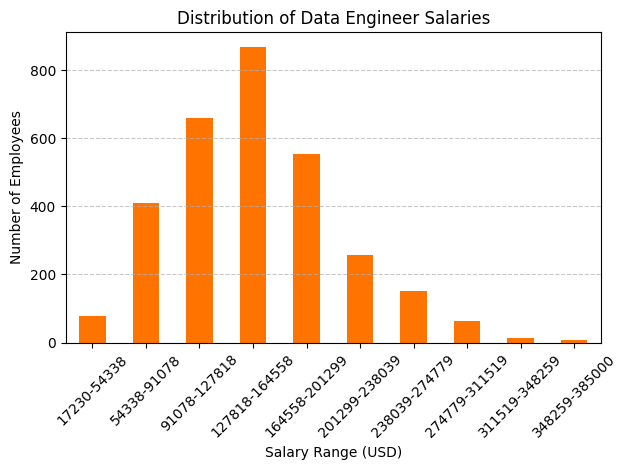


    Min = 17598
    Max = 385000
    Mean = 147170.3763
    Median = 140000
    Mode = 130000
    Deviation = 56516
    Variance = 3194076029
    Range = 367402
    Sampling Error = 2301.6732

    Estimations:
      145167.6067 < population_mean < 149173.1458
      3039833666.1018 < population_variance < 3360422082.9071
      55134.6866 < population_deviation < 57969.1477

    Based on the above statistics, we can the following inferences for Data Engineer employees:
      1) The most common salary is $130,000.00
      2) The minimum salary is $17,598.00
      3) The maximum salary is $385,000.00
      4) The average salary is $147,170.38
    


In [41]:
# inferences for samples

infer(df, 'Data Engineer')


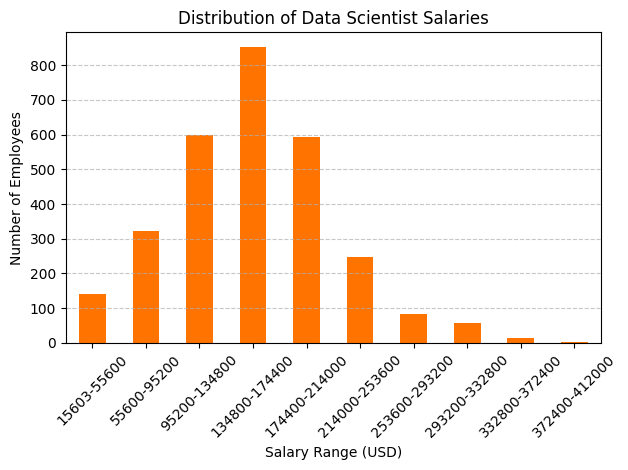


    Min = 16000
    Max = 412000
    Mean = 154357.5801
    Median = 151355
    Mode = 160000
    Deviation = 59054
    Variance = 3487343677
    Range = 396000
    Sampling Error = 4885.5306

    Estimations:
      152211.979 < population_mean < 156503.1811
      3314840855.2866 < population_variance < 3673739044.6365
      57574.6546 < population_deviation < 60611.3772

    Based on the above statistics, we can the following inferences for Data Scientist employees:
      1) The most common salary is $160,000.00
      2) The minimum salary is $16,000.00
      3) The maximum salary is $412,000.00
      4) The average salary is $154,357.58
    


In [42]:
infer(df, 'Data Scientist')

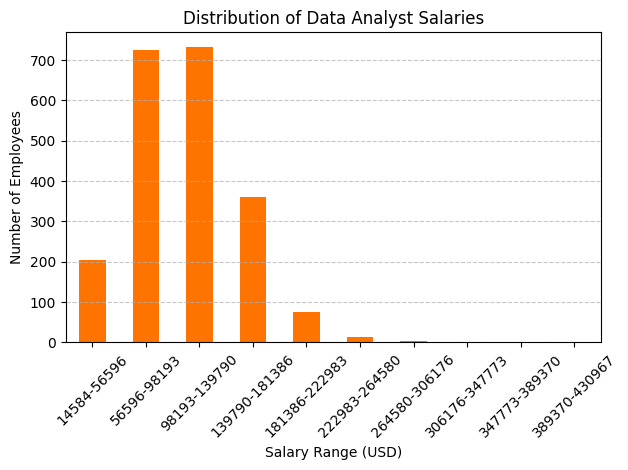


    Min = 15000
    Max = 430967
    Mean = 107934.5325
    Median = 104000
    Mode = 100000
    Deviation = 42171
    Variance = 1778413354
    Range = 415967
    Sampling Error = 41537.5169

    Estimations:
      106139.4 < population_mean < 109729.6651
      1676004557.1768 < population_variance < 1890551674.8982
      40939.0346 < population_deviation < 43480.4746

    Based on the above statistics, we can the following inferences for Data Analyst employees:
      1) The most common salary is $100,000.00
      2) The minimum salary is $15,000.00
      3) The maximum salary is $430,967.00
      4) The average salary is $107,934.53
    


In [43]:
infer(df, 'Data Analyst')

In [44]:
def salary_probability(data_frame, query, job_title=''):
  df_sample = data_frame if (job_title == '') else data_frame.query(f'job_title == "{job_title}"')
  df_queried = df_sample.query(query)
  probability = len(df_queried) / len(df_sample)
  print(f'The probability that {"an" if job_title == "" else "a " + job_title} employee will have {query} is {round(probability, 4)}')

In [45]:
salary_probability(df, 'salary > 150000')

The probability that an employee will have salary > 150000 is 0.4357


In [46]:
salary_probability(df, 'salary > 150000', job_title = 'Data Scientist')

The probability that a Data Scientist employee will have salary > 150000 is 0.5034


In [47]:
salary_probability(df, 'salary > 150000', job_title = 'Data Engineer')

The probability that a Data Engineer employee will have salary > 150000 is 0.4211


In [48]:
salary_probability(df, 'salary > 150000', job_title = 'Data Analyst')

The probability that a Data Analyst employee will have salary > 150000 is 0.1401
